In [1]:
!pip install openai
import openai
openai.api_key = "YOUR_API_KEY"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 1.8 MB/s eta 0:00:00


In [2]:
from io import StringIO
import sys
from typing import Dict, Optional
import sys
import subprocess

In [3]:
class PythonREPL:
    """Simulates a standalone Python REPL."""

    def __init__(self):
        pass

    def run(self, command: str) -> str:
        """Run command and returns anything printed."""
        sys.stderr.write("EXECUTING PYTHON CODE:\n---\n" + command + "\n---\n")
        old_stdout = sys.stdout
        sys.stdout = mystdout = StringIO()
        try:
            exec(command, globals())
            sys.stdout = old_stdout
            output = mystdout.getvalue() ## # Retrieve the entire content of the file.
        except Exception as e:
            sys.stdout = old_stdout
            output = str(e)
        sys.stderr.write("PYTHON OUTPUT: \"" + output + "\"\n")
        return output

In [4]:
import re
def extract_content(text):
    # Define the regular expression pattern
    pattern = r"```(.*?)```"
    # Find all matches in the text
    matches = re.findall(pattern, text, flags=re.DOTALL)
    # Return a list of matched contents
    return matches
def remove_python(text):
    # Replace 'python' with an empty string in the first line
    first_line = text.split('\n')[0].replace('python', '')
    # Join the first line with the rest of the text
    new_text = '\n'.join([first_line] + text.split('\n')[1:])
    # Return the new text
    return new_text


In [5]:
def dependency_install(code):
  prompt = f'''You are a helpful assistant who looks at the code passed {code}, and prints the dependencies that need to be installed before the code can be executed.
  Include only the basic dependencies in the above list those can be actually installed using `pip install dependecy i` and doesnt raise any error.
  Your output should be in the given format:

  dependency 1
  dependency 2
  denpendecy 3
  '''
  # Example OpenAI Python library request
  MODEL = "gpt-4"
  response = openai.ChatCompletion.create(
      model=MODEL,
      messages=[
          {"role": "system", "content": prompt}
      ],
      temperature=0,
  )

  for dependency in response['choices'][0]["message"]["content"].split():
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', dependency])
  return print("Successfully installed Dependencies!")

In [60]:
def code_r(prompt):

  inst = f''' You're expert code assistant. You will be provided with a prompt {prompt}.
  1. You're to understand prompt infromation.
  2. Using prompt, generate appropriate code which should perform the action mentioned in the prompt.
  3. Always verify your code is working then only return it.
  4. Don't include the keyword 'python'.
  5. Code inside (```,```) should always be working. It should not have keywords like "python"
  6. Write a print statement if required to display the answer
  '''
  # Example OpenAI Python library request
  MODEL = "gpt-4"
  response = openai.ChatCompletion.create(
      model=MODEL,
      messages=[
          {"role": "system", "content": inst}
      ],
      temperature=0,
  )
  es = extract_content(response['choices'][0]["message"]["content"])
  text = remove_python(es[0])
  dependency_install(text)
  repl = PythonREPL()
  return repl.run(text)


In [61]:
prompt = """ Write a code showing a plot with x-axis as x = [1,2,3,3] and y-axis y = [1,2,3,4]"""

EXECUTING PYTHON CODE:
---

import matplotlib.pyplot as plt

x = [1,2,3,3]
y = [1,2,3,4]

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y vs x')
plt.show()

---


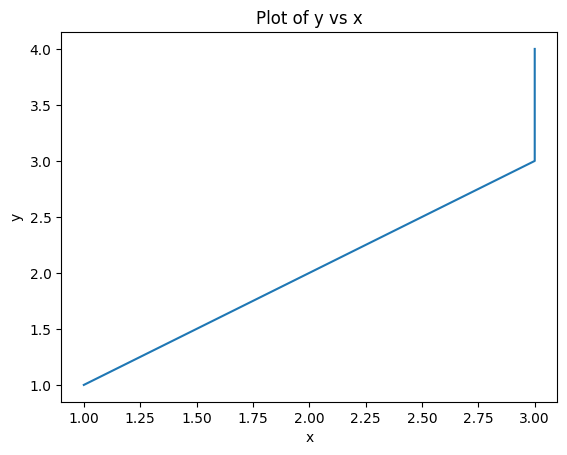

PYTHON OUTPUT: ""


''

In [62]:
code_r(prompt)